#Exercise 1

1. Create a repository at http://github.com
2. Pick a license, include a 'readme'
3. Edit the readme
4. Create a new file in the repository (test.py)
5. Copy in a program from colab (any of your exercises)
6. Edit the program, and 'commit' it.
7. Copy back out the program to colab again and run it.
8. View the commit history.

ADVANCED

9. Check out the repository to your own machine (requires Git or SVN)
10. Run your file on your machine (requires Python and probably Tellurium)
11. Edit it and check it back in.
12. View the commit history on github


#Exercise 2

1. Visit https://github.com/luciansmith/network-modeling-2021-example
2. Copy the python script (analyze_wolf_glycolysis.py) into colab (below) and run it.
   (Note: you'll need a '!pip install tellurium' added at the top, which I've done below.)
3. It doesn't oscillate!  Did it use to?  Check out the very first version and check.
4. Find out when I made a mistake and why it happened.
5. File a bug report ('issue') and describe what the problem is.
6. Examine some of the other commits.  Can you tell what's going on?

ADVANCED

6. Create a fork of the repository
7. Fix the model so it oscillates again, check that in to your fork.
8. Put back in the annotations and units, check that in.
9. (extra advanced): Create a pull request back to my repository to fix everything.



# Packages and constants <a class="anchor" id="packages-constants"></a>

In [1]:
# Install packages
!pip install tellurium -q

# Import packages
import tellurium as te # Python-based modeling environment for kinetic models


     |████████████████████████████████| 118 kB 5.2 MB/s 
     |████████████████████████████████| 36.7 MB 13 kB/s 
     |████████████████████████████████| 14.9 MB 98 kB/s 
     |████████████████████████████████| 3.2 MB 44.4 MB/s 
     |████████████████████████████████| 6.2 MB 35.1 MB/s 
     |████████████████████████████████| 2.5 MB 42.5 MB/s 
     |████████████████████████████████| 28.5 MB 33 kB/s 
     |████████████████████████████████| 5.8 MB 22.3 MB/s 
     |████████████████████████████████| 16.6 MB 27 kB/s 
     |████████████████████████████████| 2.0 MB 30.8 MB/s 
     |████████████████████████████████| 3.1 MB 51.0 MB/s 
     |████████████████████████████████| 5.6 MB 26.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.

# Pasted code

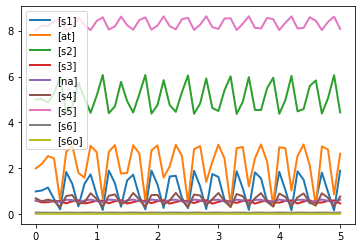

In [2]:
#paste code here
import tellurium as te
import roadrunner

r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml")

r.simulate()
r.plot()

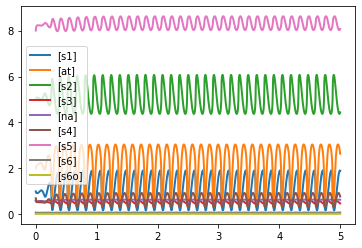

In [3]:

import tellurium as te
import roadrunner

r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml")

r.simulate(0,5,1000)
r.plot()

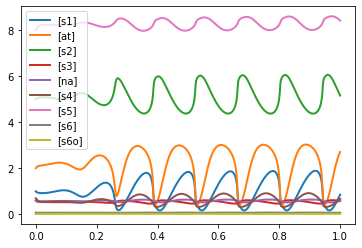

In [4]:

import tellurium as te
import roadrunner

r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml")

r.simulate(0,1,500)
r.plot()

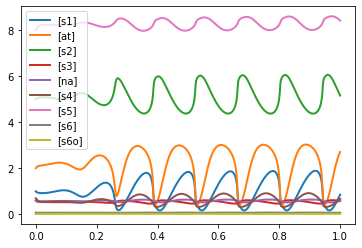

// Created by libAntimony v2.12.0
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;
 

In [5]:

import tellurium as te
import roadrunner
import antimony

r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml")

r.simulate(0,1,500)
r.plot()

sbml = r.getSBML()
antimony.loadSBMLString(sbml)
print(antimony.getAntimonyString())

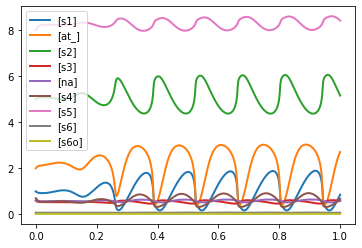

In [6]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;
  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 50;
  k0 has mM_min_1;
  k1 = 550;
  k1 has mM_1_min_1;
  k2 = 9.8;
  k2 has min_1;
  k31 = 323.8;
  k31 has mM_1_min_1;
  k33 = 57823.1;
  k33 has mM_1_min_1;
  k32 = 76411.1;
  k32 has mM_1_min_1;
  k34 = 23.7;
  k34 has mM_1_min_1;
  k4 = 80;
  k4 has mM_1_min_1;
  k5 = 9.7;
  k5 has min_1;
  k6 = 2000;
  k6 has mM_1_min_1;
  k7 = 28;
  k7 has min_1;
  k8 = 85.7;
  k8 has mM_1_min_1;
  k9 = 80;
  k9 has min_1;
  k10 = 375;
  k10 has min_1;
  atot = 4;
  atot has mM;
  ntot = 1;
  ntot has mM;
  n = 4;
  n has dimensionless;
  ki = 1;
  ki has mM;
  // Other declarations:
  const compartment_, k0, k1, k2, k31, k33, k32, k34, k4, k5, k6, k7, k8;
  const k9, k10, atot, ntot, n, ki;
  // Unit definitions:
  unit substance = 1e-3 mole;
  unit time_unit = 60 second;
  unit mM = 1e-3 mole / litre;
  unit mM_min_1 = 1e-3 mole / (litre * 60 second);
  unit min_1 = 1 / 60 second;
  unit mM_1_min_1 = litre / (1e-3 mole * 60 second);
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
  // CV terms:
  s1 identity "http://identifiers.org/obo.chebi/CHEBI:17234",
              "http://identifiers.org/kegg.compound/C00293"
  at_ identity "http://identifiers.org/obo.chebi/CHEBI:15422",
               "http://identifiers.org/kegg.compound/C00002"
  s2 identity "http://identifiers.org/obo.chebi/CHEBI:16905",
              "http://identifiers.org/kegg.compound/C05378"
  s3 part "http://identifiers.org/obo.chebi/CHEBI:16108",
          "http://identifiers.org/obo.chebi/CHEBI:29052",
          "http://identifiers.org/kegg.compound/C00111",
          "http://identifiers.org/kegg.compound/C00118"
  na identity "http://identifiers.org/obo.chebi/CHEBI:15846",
              "http://identifiers.org/kegg.compound/C00003"
  s4 identity "http://identifiers.org/obo.chebi/CHEBI:17794",
              "http://identifiers.org/kegg.compound/C00197"
  s5 identity "http://identifiers.org/kegg.compound/C00022",
              "http://identifiers.org/chebi/CHEBI:32816"
  s5 identity "http://identifiers.org/obo.chebi/CHEBI:15361"
  s6 identity "http://identifiers.org/obo.chebi/CHEBI:15343",
              "http://identifiers.org/kegg.compound/C00084"
  s6o identity "http://identifiers.org/obo.chebi/CHEBI:15343",
               "http://identifiers.org/kegg.compound/C00084"
  v1 part "http://identifiers.org/kegg.reaction/R00756",
          "http://identifiers.org/kegg.reaction/R00299"
  v1 part "http://identifiers.org/ec-code/2.7.1.11",
          "http://identifiers.org/ec-code/5.3.1.9"
  v2 identity "http://identifiers.org/ec-code/4.1.2.13",
              "http://identifiers.org/kegg.reaction/R01070"
  v3 part "http://identifiers.org/ec-code/2.7.2.3",
          "http://identifiers.org/ec-code/1.2.1.12"
  v4 part "http://identifiers.org/kegg.reaction/R00658",
          "http://identifiers.org/kegg.reaction/R00200"
  v4 part "http://identifiers.org/ec-code/2.7.1.40"
  v5 hypernym "http://identifiers.org/ec-code/4.1.1.1",
              "http://identifiers.org/kegg.reaction/R00224"
  v7 hypernym "http://identifiers.org/obo.go/GO:0006754"
  v8 part "http://identifiers.org/kegg.reaction/R05679"
  v9 hypernym "http://identifiers.org/obo.go/GO:0046187"
  v6 hypernym "http://identifiers.org/ec-code/1.1.1.71",
              "http://identifiers.org/kegg.reaction/R00754"
  v0 hypernym "http://identifiers.org/obo.go/GO:0046323"
end
Wolf2000_Glycolytic_Oscillations is "Wolf2000_Glycolytic_Oscillations"
Wolf2000_Glycolytic_Oscillations model_entity_is "http://identifiers.org/biomodels.db/MODEL3352181362"
Wolf2000_Glycolytic_Oscillations model_entity_is "http://identifiers.org/biomodels.db/BIOMD0000000206"
Wolf2000_Glycolytic_Oscillations description "http://identifiers.org/pubmed/10692304"
Wolf2000_Glycolytic_Oscillations taxon "http://identifiers.org/taxonomy/4932"
Wolf2000_Glycolytic_Oscillations hypernym "http://identifiers.org/obo.go/GO:0006096"
Wolf2000_Glycolytic_Oscillations identity "http://identifiers.org/kegg.pathway/sce00010"
""")    
r.simulate(0,1,500)
r.plot()

In [7]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;
  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 50;
  k0 has mM_min_1;
  k1 = 550;
  k1 has mM_1_min_1;
  k2 = 9.8;
  k2 has min_1;
  k31 = 323.8;
  k31 has mM_1_min_1;
  k33 = 57823.1;
  k33 has mM_1_min_1;
  k32 = 76411.1;
  k32 has mM_1_min_1;
  k34 = 23.7;
  k34 has mM_1_min_1;
  k4 = 80;
  k4 has mM_1_min_1;
  k5 = 9.7;
  k5 has min_1;
  k6 = 2000;
  k6 has mM_1_min_1;
  k7 = 28;
  k7 has min_1;
  k8 = 85.7;
  k8 has mM_1_min_1;
  k9 = 80;
  k9 has min_1;
  k10 = 375;
  k10 has min_1;
  atot = 4;
  atot has mM;
  ntot = 1;
  ntot has mM;
  n = 4;
  n has dimensionless;
  ki = 1;
  ki has mM;
  // Other declarations:
  const compartment_, k0, k1, k2, k31, k33, k32, k34, k4, k5, k6, k7, k8;
  const k9, k10, atot, ntot, n, ki;
  // Unit definitions:
  unit substance = 1e-3 mole;
  unit time_unit = 60 second;
  unit mM = 1e-3 mole / litre;
  unit mM_min_1 = 1e-3 mole / (litre * 60 second);
  unit min_1 = 1 / 60 second;
  unit mM_1_min_1 = litre / (1e-3 mole * 60 second);
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()
© 2021 GitHub, 

SyntaxError: ignored

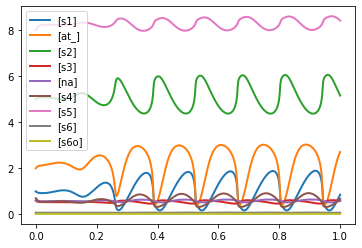

In [9]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;
  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 50;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 80;
  k5 = 9.7;
  k6 = 2000;
  k7 = 28;
  k8 = 85.7;
  k9 = 80;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

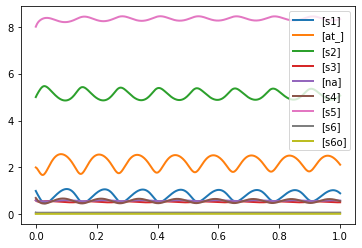

In [10]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;
  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 50;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 80;
  k5 = 9.7;
  k6 = 2000;
  k7 = 28;
  k8 = 85.7;
  k9 = 80;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 3.7;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

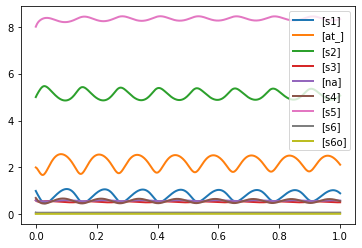

In [11]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;
  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 50;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 80;
  k5 = 9.7;
  k6 = 2000;
  k7 = 28;
  k8 = 85.7;
  k9 = 80;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 3.7;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

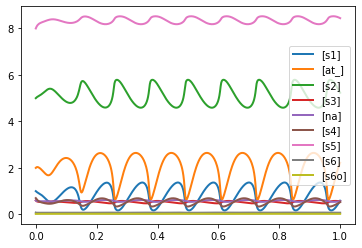

In [12]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;
  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 50;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 80;
  k5 = 9.7;
  k6 = 2000;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 80;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

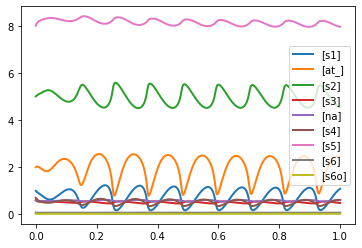

In [13]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;
  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2000;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 80;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

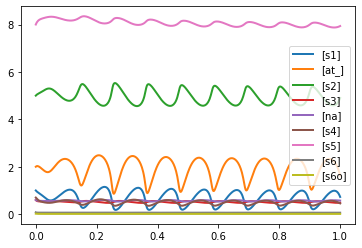

In [14]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;
  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

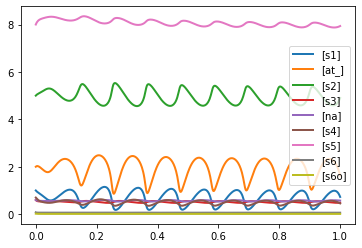

In [15]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 at_ -> s2; k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + na -> s4 + at_; ((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; k4*s4*(atot - at_);
  v5: s5 -> s6; k5*s5;
  v7: at_ -> ; k7*at_;
  v8: s3 -> na; k8*s3*(ntot - na);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> na; k6*s6*(ntot - na);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  at_ = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  at_ is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

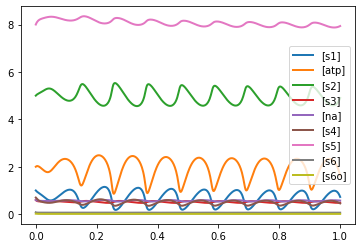

In [16]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + na -> s4 + atp; ((k31*k32*s3*na*(atot - atp) - k33*k34*s4*atp*(ntot - na))/(k33*(ntot - na) + k32*(atot - atp)));
  v4: s4 -> s5 + atp; k4*s4*(atot - atp);
  v5: s5 -> s6; k5*s5;
  v7: atp -> ; k7*atp;
  v8: s3 -> na; k8*s3*(ntot - na);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> na; k6*s6*(ntot - na);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Compartment initializations:
  compartment_ = 1;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

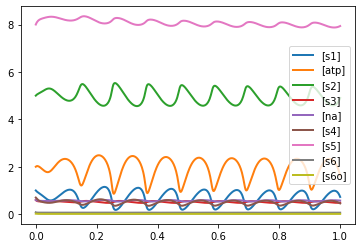

In [17]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + na -> s4 + atp; ((k31*k32*s3*na*(atot - atp) - k33*k34*s4*atp*(ntot - na))/(k33*(ntot - na) + k32*(atot - atp)));
  v4: s4 -> s5 + atp; k4*s4*(atot - atp);
  v5: s5 -> s6; k5*s5;
  v7: atp -> ; k7*atp;
  v8: s3 -> na; k8*s3*(ntot - na);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> na; k6*s6*(ntot - na);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  s2 = 5;
  s3 = 0.6;
  na = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display Names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  na is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

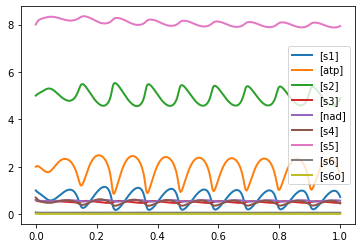

In [18]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + nad -> s4 + atp; ((k31*k32*s3*nad*(atot - atp) - k33*k34*s4*atp*(ntot - nad))/(k33*(ntot - nad) + k32*(atot - atp)));
  v4: s4 -> s5 + atp; k4*s4*(atot - atp);
  v5: s5 -> s6; k5*s5;
  v7: atp -> ; k7*atp;
  v8: s3 -> nad; k8*s3*(ntot - nad);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> nad; k6*s6*(ntot - nad);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  s2 = 5;
  s3 = 0.6;
  nad = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display nadmes:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  nad is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

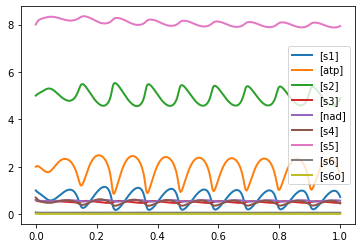

In [19]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + nad -> s4 + atp; ((k31*k32*s3*nad*(atot - atp) - k33*k34*s4*atp*(ntot - nad))/(k33*(ntot - nad) + k32*(atot - atp)));
  v4: s4 -> s5 + atp; k4*s4*(atot - atp);
  v5: s5 -> s6; k5*s5;
  v7: atp -> ; k7*atp;
  v8: s3 -> nad; k8*s3*(ntot - nad);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> nad; k6*s6*(ntot - nad);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  s2 = 5;
  s3 = 0.6;
  nad = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  nad is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

In [21]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + nad + adp + pi -> s4 + atp; ((k31*k32*s3*nad*(atot - atp) - k33*k34*s4*atp*(ntot - nad))/(k33*(ntot - nad) + k32*(atot - atp)));
  v4: s4 + adp + pi -> s5 + atp; k4*s4*(atot - atp);
  v5: s5 -> s6; k5*s5;
  v7: atp -> adp + pi; k7*atp;
  v8: s3 -> nad; k8*s3*(ntot - nad);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> nad; k6*s6*(ntot - nad);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  adp = atot - atp
  pi = 1000
  s2 = 5;
  s3 = 0.6;
  nad = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  nad is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



Exception: ignored

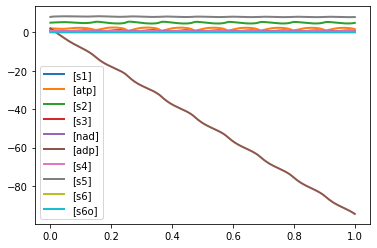

In [22]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + nad + adp + $pIn -> s4 + atp; ((k31*k32*s3*nad*(atot - atp) - k33*k34*s4*atp*(ntot - nad))/(k33*(ntot - nad) + k32*(atot - atp)));
  v4: s4 + adp + pIn -> s5 + atp; k4*s4*(atot - atp);
  v5: s5 -> s6; k5*s5;
  v7: atp -> adp + pIn; k7*atp;
  v8: s3 -> nad; k8*s3*(ntot - nad);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> nad; k6*s6*(ntot - nad);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  adp = atot - atp
  pIn = 1000
  s2 = 5;
  s3 = 0.6;
  nad = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  nad is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

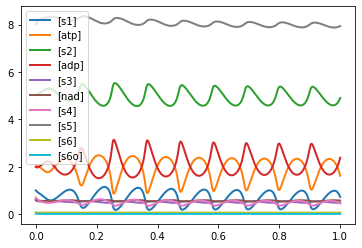

In [23]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2 + 2 adp + 2 pIn; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + nad + adp + $pIn -> s4 + atp; ((k31*k32*s3*nad*(atot - atp) - k33*k34*s4*atp*(ntot - nad))/(k33*(ntot - nad) + k32*(atot - atp)));
  v4: s4 + adp + pIn -> s5 + atp; k4*s4*(atot - atp);
  v5: s5 -> s6; k5*s5;
  v7: atp -> adp + pIn; k7*atp;
  v8: s3 -> nad; k8*s3*(ntot - nad);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> nad; k6*s6*(ntot - nad);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  adp = atot - atp
  pIn = 1000
  s2 = 5;
  s3 = 0.6;
  nad = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  nad is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

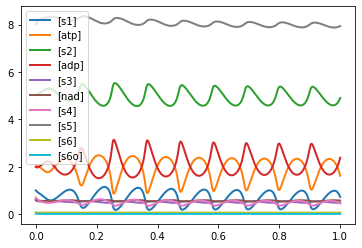

In [24]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2 + 2 adp + 2 $pIn; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + nad + adp + $pIn -> s4 + atp; ((k31*k32*s3*nad*(atot - atp) - k33*k34*s4*atp*(ntot - nad))/(k33*(ntot - nad) + k32*(atot - atp)));
  v4: s4 + adp + $pIn -> s5 + atp; k4*s4*(atot - atp);
  v5: s5 -> s6; k5*s5;
  v7: atp -> adp + $pIn; k7*atp;
  v8: s3 -> nad; k8*s3*(ntot - nad);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> nad; k6*s6*(ntot - nad);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  adp = atot - atp
  pIn = 1000
  s2 = 5;
  s3 = 0.6;
  nad = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  nad is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()

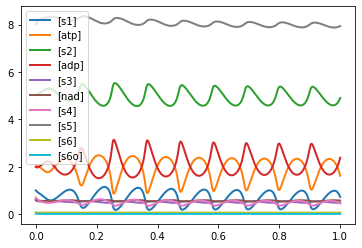

In [25]:

r = te.loada("""
// Created by libAntimony v2.12.0.3
model *Wolf2000_Glycolytic_Oscillations()
  // Reactions:
  v1: s1 + 2 atp -> s2 + 2 adp + 2 $pIn; k1*s1*atp/(1 + (atp/ki)^n);
  v2: s2 -> 2 s3; k2*s2;
  v3: s3 + nad + adp + $pIn -> s4 + atp; ((k31*k32*s3*nad*adp - k33*k34*s4*atp*(ntot - nad))/(k33*(ntot - nad) + k32*adp));
  v4: s4 + adp + $pIn -> s5 + atp; k4*s4*adp;
  v5: s5 -> s6; k5*s5;
  v7: atp -> adp + $pIn; k7*atp;
  v8: s3 -> nad; k8*s3*(ntot - nad);
  v9: s6o -> ; k9*s6o;
  v10: s6 -> 0.1 s6o; k10*(s6 - s6o);
  v6: s6 -> nad; k6*s6*(ntot - nad);
  v0:  -> s1; k0;
  // Species initializations:
  s1 = 1;
  atp = 2;
  adp = atot - atp
  pIn = 1000
  s2 = 5;
  s3 = 0.6;
  nad = 0.6;
  s4 = 0.7;
  s5 = 8;
  s6 = 0.08;
  s6o = 0.02;
  // Variable initializations:
  k0 = 48.2;
  k1 = 550;
  k2 = 9.8;
  k31 = 323.8;
  k33 = 57823.1;
  k32 = 76411.1;
  k34 = 23.7;
  k4 = 77.77;
  k5 = 9.7;
  k6 = 2140;
  k7 = 31.17;
  k8 = 85.7;
  k9 = 180;
  k10 = 375;
  atot = 4;
  ntot = 1;
  n = 4;
  ki = 1;
  // Display names:
  substance is "milli mole";
  time_unit is "min";
  s1 is "Glucose";
  atp is "ATP";
  s2 is "F16P";
  s3 is "Triose_Gly3Phos_DHAP";
  nad is "NAD";
  s4 is "3PG";
  s5 is "Pyruvate";
  s6 is "Acetaldehyde";
  s6o is "extracellular acetaldehyde";
end
""")    
r.simulate(0,1,500)
r.plot()